<a href="https://www.kaggle.com/code/usmanayaz/asia-cup-winner-historical-data-analysis?scriptVersionId=118746427" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Asia Cup Winner 2022**

# 1- Historical Background

The Asian Cricket Council Asia Cup is a men's One Day International and Twenty20 International cricket tournament. It was established in 1983 when the Asian Cricket Council was founded as a measure to promote goodwill between Asian countries.  The Asia Cup is the only continental championship in cricket and the winning team becomes the champions of Asia. Asia Cup was first started in 1984.

Asia Cup 2022 will start from August 27 in the **United Arab Emirates (UAE)**. The 15th edition of the ASIA CUP 2022 has been scheduled from 27 August 2022 to 11 September 2022. A total of six teams which includes India, Pakistan, Sri Lanka, Bangladesh and Afghanistan will compete for Asian supremacy.

![AsiaCup](https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiWkVDQB-rVP-hzpJVczSWLWh8mGww-P41HqjO4kD-oNefPjGx7NrvanaHgJIOblKqjINWeRpB-Lr3FtkAyQYXdAZjQPUbstG12w0kCrtFORtBBK1XVBSFCOyJ4oJufP2xhb8EsR3lk84l9pJMFssFaDmg6477ZK4xR_Hk8VQ-TkmBkPZaQuuLrkbFj/s1600/Asia-Cup.jpg)

# 2- About Dataset

The dataset has been compiled to address following three aspects: 

1. Historical (All Asia Cup matches between 1984 and 2018)
2. Analytical (Players Data)
3. Predictive (Utilize historical data, players data and one vs. one win/loss ratio of participating teams to predict winner of each match)

# 3- Exploratory Data Analysis

Now we will explore the dataset to get to know about the dataset and insights about it.

## 3.1- Load Useful Libraries

In [1]:
# We will import pandas library for data analysis
import pandas as pd

# For data visualization we will use the following libraries
import matplotlib.pyplot as plt
import seaborn as sns

# For interactive data visualization we use plotly
import plotly.express as px

## 3.2- Load Datasets

We have three datasets available all asia cup matches, all batsmen data and one_vs_one_win_ratio data. The data is in tabular format.

In [2]:
# All asia cup matches dataset
asia_cup = pd.read_csv('../input/predict-asia-cup-winner-2022/all_asia_cup_matches.csv')

# All batsmen data
batsmen = pd.read_csv('../input/predict-asia-cup-winner-2022/all_batsmen_data.csv')

# One vs One Win Ratio
win_ratio = pd.read_csv('../input/predict-asia-cup-winner-2022/one_vs_one_win_ratio.csv')

## 3.3- Explore Datasets

**1- All Asia Cup Matches Dataset**

In [3]:
print('The First five rows asia cup matches dataset are: \n')

asia_cup.head()

The First five rows asia cup matches dataset are: 



,Team 1,Team 2,Year,Venue,Format,Won,1st Innings,2nd Innings
0,Pakistan,Sri Lanka,1984,Sharjah,ODI,Sri Lanka,N,Y
1,Sri Lanka,India,1984,Sharjah,ODI,India,N,Y
2,India,Pakistan,1984,Sharjah,ODI,India,Y,N
3,Pakistan,Sri Lanka,1986,Colombo,ODI,Pakistan,Y,N
4,Bangladesh,Pakistan,1986,Moratuwa,ODI,Pakistan,N,Y


In [4]:
# Check shape of asia cup matches dataset
rows, columns = asia_cup.shape

print(f'Asia cup matches dataset contains the {rows} rows and {columns} columns.')

Asia cup matches dataset contains the 104 rows and 8 columns.


In [5]:
#Check data structure of asia cup matches dataset
asia_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Team 1       104 non-null    object
 1   Team 2       104 non-null    object
 2   Year         104 non-null    int64 
 3   Venue        104 non-null    object
 4   Format       104 non-null    object
 5   Won          104 non-null    object
 6   1st Innings  104 non-null    object
 7   2nd Innings  104 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.6+ KB


In [6]:
# Check descriptive statistics of dataset
asia_cup.describe()

,Year
count,104.000000
mean,2003.951923
std,10.191735
min,1984.000000
25%,1997.000000
50%,2004.000000
75%,2012.000000
max,2018.000000


### *All asia cup matches dataset contains the historical data from the year 1984 to 2018. 25% of Asia cup matches are played between 1997, 50% Asia cup matches are played between 2004 and 75% Asia cup matches are played between 2012.*

# **4-Historical Data Analysis**
# **4.1- Which team has won most Asia Cups?**

In [7]:
# find the unique values
asia_cup['Won'].unique()

array(['Sri Lanka', 'India', 'Pakistan', 'No Result', 'Bangladesh',
       'Afghanistan', 'Tied'], dtype=object)

### *The teams played are asia cups are Srilanka, India, Pakistan, Bangladesh and Afghanistan.*

In [8]:
# Find the most frequent values
asia_cup['Won'].value_counts()

Sri Lanka      34
India          31
Pakistan       26
Bangladesh      7
Afghanistan     3
No Result       2
Tied            1
Name: Won, dtype: int64

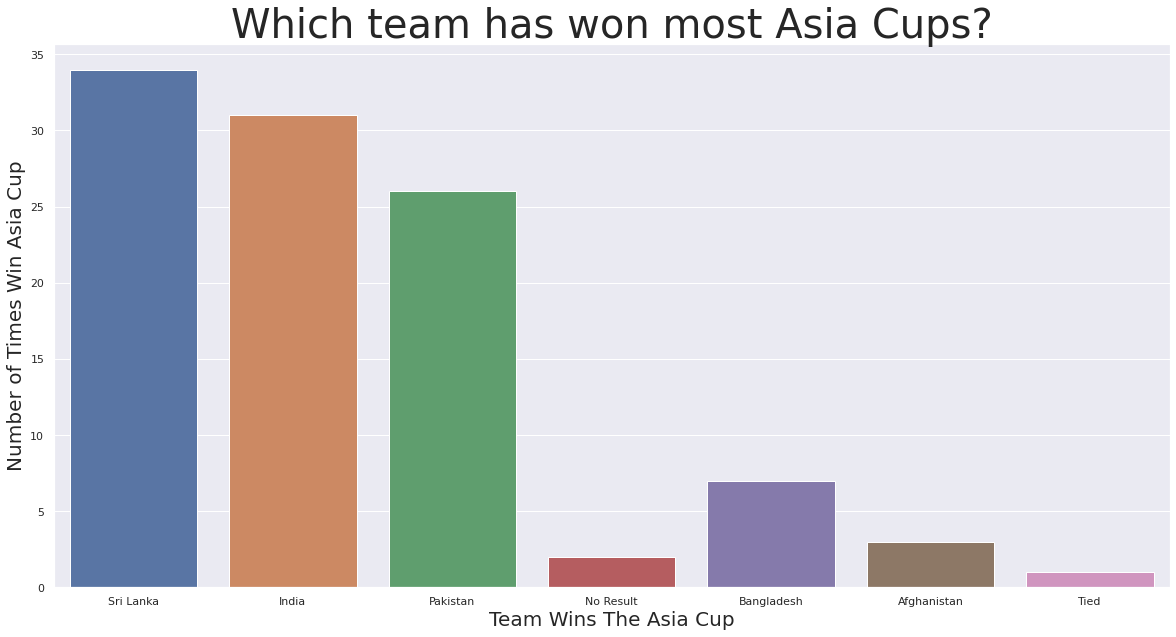

In [9]:
# Set figure size
plt.figure(figsize = (20, 10))

# Set theme
sns.set_theme(style="darkgrid")

sns.countplot(x = 'Won', data = asia_cup)

#set xlabel
plt.xlabel('Team Wins The Asia Cup', size = 20)

#set ylabel
plt.ylabel('Number of Times Win Asia Cup', size = 20)

#set title
plt.title('Which team has won most Asia Cups?', size = 40)

plt.show()

### *Sirilanka has won the most asia cups*

# **4.2- What's the most popular venue for Asia Cup matches?**

In [10]:
# Most popular venue for Asia cup matches
asia_cup['Venue'].value_counts()

Colombo       20
Mirpur        13
Dhaka         12
Sharjah       10
Dambulla      10
Karachi       10
Dubai          8
Fatullah       5
Abu Dhabi      5
Lahore         3
Chattogram     2
Kolkota        2
Moratuwa       1
Kandy          1
Chandigarh     1
Cuttack        1
Name: Venue, dtype: int64

## *The most popular venue for Asia cup matches is Colombo.*

# **4.3- When did Bangladesh won its first Asia Cup match?**

In [11]:
asia_cup[asia_cup['Won'] == 'Bangladesh']

,Team 1,Team 2,Year,Venue,Format,Won,1st Innings,2nd Innings
40,Bangladesh,Hong Kong,2004,Colombo,ODI,Bangladesh,Y,N
53,Bangladesh,United Arab Emirates,2008,Lahore,ODI,Bangladesh,Y,N
76,India,Bangladesh,2012,Mirpur,ODI,Bangladesh,N,Y
78,Sri Lanka,Bangladesh,2012,Mirpur,ODI,Bangladesh,N,Y
91,Bangladesh,Sri Lanka,2018,Dubai,ODI,Bangladesh,Y,N
100,Bangladesh,Afghanistan,2018,Abu Dhabi,ODI,Bangladesh,Y,N
102,Bangladesh,Pakistan,2018,Abu Dhabi,ODI,Bangladesh,Y,N


## *Bangladesh won its first Asia Cup match in 2004 in Colombo when played against HongKong*

# **4.4- What's the win/loss ratio between arch-rivals India & Pakistan?**

In [12]:
asia_cup_subset = asia_cup[['Team 1', 'Team 2', 'Won']]
asia_cup_subset.head()

,Team 1,Team 2,Won
0,Pakistan,Sri Lanka,Sri Lanka
1,Sri Lanka,India,India
2,India,Pakistan,India
3,Pakistan,Sri Lanka,Pakistan
4,Bangladesh,Pakistan,Pakistan


In [13]:
# make subset for team 1 which only posses pakistan and indian teams
team1 = asia_cup_subset['Team 1'].isin(['Pakistan', 'India'])

# make subset for team 1 which only posses pakistan and indian teams
team2 = asia_cup_subset['Team 2'].isin(['Pakistan', 'India'])

#apply filter on the dataset
pak_ind = asia_cup_subset[team1 & team2]

pak_ind

,Team 1,Team 2,Won
2,India,Pakistan,India
11,Pakistan,India,India
20,Pakistan,India,Pakistan
28,Pakistan,India,No Result
29,India,Pakistan,No Result
37,Pakistan,India,Pakistan
49,Pakistan,India,Pakistan
58,Pakistan,India,India
62,India,Pakistan,Pakistan
69,Pakistan,India,India


In [14]:
# count how many times in Asia cup india and pakistan played
no_of_times_played = len(pak_ind)
print(f'There are total {no_of_times_played} matches in asia cup played between India and Pakistan. \n')

#count how many times no result declare
no_result = len(pak_ind[pak_ind['Won'] == 'No Result'])
print(f'{no_result} times No Results were declared out of {no_of_times_played} matches. \n')


#count how many times india won match
india_win = len(pak_ind[pak_ind['Won'] == 'India'])
#how many times india loss match
india_loss = no_of_times_played - india_win - no_result
print(f'India wins {india_win} times and loss match {india_loss} times out of {no_of_times_played} matches. \n')

#count how many times pakistan win match
pak_win = len(pak_ind[pak_ind['Won'] == 'Pakistan'])
#how many times pakistan loss match
pak_loss = no_of_times_played - pak_win - no_result
print(f'Pakistan wins {pak_win} times and loss match {pak_loss} times out of {no_of_times_played} matches. \n')


#calculate win rate between india and pakistan
win = round(((india_win + pak_win) / (no_of_times_played) * 100), 2)
print(f'The win rate between India and Pakistan is {win} %. \n')

# loss rate
loss = round(100 - win, 2)
print(f'The loss rate between India and Pakistan is {loss} %. \n')

# win/loss ratio
print('Win/loss ratio between India and Pakistan is ', round(win/loss, 2))

There are total 14 matches in asia cup played between India and Pakistan. 

2 times No Results were declared out of 14 matches. 

India wins 7 times and loss match 5 times out of 14 matches. 

Pakistan wins 5 times and loss match 7 times out of 14 matches. 

The win rate between India and Pakistan is 85.71 %. 

The loss rate between India and Pakistan is 14.29 %. 

Win/loss ratio between India and Pakistan is  6.0


# **4.5- Historically, what should a team prefer? Chasing a target or setting a target?**

In [15]:
asia_cup['1st Innings'].value_counts()

N    55
Y    49
Name: 1st Innings, dtype: int64

In [16]:
asia_cup['2nd Innings'].value_counts()

Y    52
N    52
Name: 2nd Innings, dtype: int64

In [17]:
px.bar(asia_cup, y = ['1st Innings', '2nd Innings'], barmode = 'group',
      title = 'Chasing a target or setting a target', labels = {'value': 'Setting a target of chasing a target'},
      height = 800)

#### *As we saw in above graphical representation of 1st and 2nd innings 49 teams wants 1st innings while 52 teams wants 2nd inning, on other hand 55 teams denied for 1st inning and 52 teams denied for 2nd innings. It means teams are more in favor of chasing a target as compared to setting a target. If we conclude based on historical data, team should "Chasing a Target".*

# 5- Analytical Data analysis of Players data

In [18]:
# Check first few rows of batsmen data
batsmen.head()

,Team,Player,Filter,Matches,Runs,Highest,Average,Strike Rate
0,India,Rohit Sharma,vs Pakistan,8,70,30,14.00,127.27
1,India,Rohit Sharma,vs Afghanistan,2,75,74,75.00,156.25
2,India,Rohit Sharma,vs Sri Lanka,18,339,118,21.18,138.93
3,India,Rohit Sharma,vs Bangladesh,11,452,89,41.09,144.40
4,India,Rohit Sharma,year 2022,13,290,64,24.16,140.09


In [19]:
# check rows and columns of data
rows, columns = batsmen.shape
print(f'There are {rows} rows and {columns} columns in all batsmen dataset')

There are 200 rows and 8 columns in all batsmen dataset


In [20]:
# check datastructure of all batsmen dataset
batsmen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Team         200 non-null    object 
 1   Player       200 non-null    object 
 2   Filter       200 non-null    object 
 3   Matches      200 non-null    int64  
 4   Runs         200 non-null    int64  
 5   Highest      200 non-null    int64  
 6   Average      184 non-null    float64
 7   Strike Rate  200 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 12.6+ KB


In [21]:
# Check descriptive statistics of dataset
batsmen.describe()

,Matches,Runs,Highest,Average,Strike Rate
count,200.000000,200.000000,200.000000,184.000000,200.000000
mean,4.615000,83.075000,36.130000,23.994837,120.013300
std,3.556687,89.368692,25.121076,17.875742,48.964631
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,20.750000,16.750000,11.937500,97.722500
50%,4.000000,50.000000,31.000000,21.090000,119.430000
75%,7.000000,112.000000,52.250000,31.615000,136.645000
max,18.000000,452.000000,118.000000,92.000000,400.000000


- Maximum matches played by players are 18
- Maximum runs made by players are 452 runs
- Maximum strike rate is 400 

# **5.1 - Which team has highest cumulative batting average?**

In [22]:
batsmen['cumulative_batting_average'] = batsmen['Average'].expanding().mean()

In [23]:
batsmen['cumulative_batting_average'].max()

46.120769230769234

In [24]:
batsmen[batsmen['cumulative_batting_average'] == 46.120769230769234]

,Team,Player,Filter,Matches,Runs,Highest,Average,Strike Rate,cumulative_batting_average
12,India,Virat Kohli,vs Bangladesh,4,129,57,64.5,113.15,46.120769


#### *India vs Bangladesh has the highest cumulative batting average*

# **5.2 - Which team has highest cumulative strike rate?**

In [25]:
batsmen['cumulative_strike_rate_average'] = batsmen['Strike Rate'].expanding().mean()

In [26]:
batsmen['cumulative_strike_rate_average'].max()

147.9231914893617

In [27]:
batsmen[batsmen['cumulative_strike_rate_average'] == 147.9231914893617]

,Team,Player,Filter,Matches,Runs,Highest,Average,Strike Rate,cumulative_batting_average,cumulative_strike_rate_average
46,Pakistan,Asif Ali,vs Afghanistan,1,25,25,NaN,357.14,35.272051,147.923191


#### *Pakistan vs Afghanistan has the highest cumulative strike rate average*

# **5.3 - Who are the top batsmen in terms of overall performances?**

In [28]:
batsmen_subset = batsmen.sort_values(by = ['Runs'], ascending = False)

# Top 10 players by number of runs
top_10 = batsmen_subset.iloc[:10]

top_10

,Team,Player,Filter,Matches,Runs,Highest,Average,Strike Rate,cumulative_batting_average,cumulative_strike_rate_average
3,India,Rohit Sharma,vs Bangladesh,11,452,89,41.09,144.40,37.817500,141.712500
16,India,Suryakumar Yadav,year 2022,12,428,117,38.90,189.38,42.336471,132.976471
2,India,Rohit Sharma,vs Sri Lanka,18,339,118,21.18,138.93,36.726667,140.816667
11,India,Virat Kohli,vs Sri Lanka,7,339,82,84.75,140.60,44.589167,128.745833
161,Sri Lanka,Pathum Nissanka,year 2022,11,326,75,29.63,114.38,24.969660,122.504444
9,India,Virat Kohli,vs Pakistan,7,311,78,77.75,118.25,40.032000,127.615000
154,Sri Lanka,Dasun Shanaka,year 2022,11,308,74,44.00,145.28,25.110143,122.662452
114,Bangladesh,Mushfiqur Rahim,vs Sri Lanka,10,296,72,42.28,149.49,27.066337,129.244348
7,India,KL Rahul,vs Sri Lanka,8,295,89,42.14,141.14,36.196250,128.666250
101,Bangladesh,Shakib Al Hasan,vs Pakistan,9,292,84,41.71,127.51,26.928315,130.304118


In [29]:
px.bar(top_10, x = 'Player', y = 'Runs', color = 'Team', title = 'Top 10 players by overall performance',
      text_auto = True)

# **5.4 - Who are the top batsmen in terms of recent performances?**

In [30]:
#filter the dataset for recent matches which is year 2022
batsmen_recent = batsmen[batsmen['Filter'] == 'year 2022']

#sort the dataset by runs to get the top performers in recent matches
batsmen_recent_sort = batsmen_recent.sort_values(by = ['Runs'], ascending = False)

#Get the top 10
top_10_recent = batsmen_recent_sort.iloc[:10]

top_10_recent

,Team,Player,Filter,Matches,Runs,Highest,Average,Strike Rate,cumulative_batting_average,cumulative_strike_rate_average
16,India,Suryakumar Yadav,year 2022,12,428,117,38.90,189.38,42.336471,132.976471
161,Sri Lanka,Pathum Nissanka,year 2022,11,326,75,29.63,114.38,24.969660,122.504444
154,Sri Lanka,Dasun Shanaka,year 2022,11,308,74,44.00,145.28,25.110143,122.662452
4,India,Rohit Sharma,year 2022,13,290,64,24.16,140.09,35.086000,141.388000
31,India,Hardik Pandya,year 2022,13,281,51,31.22,139.80,36.887241,144.128750
23,India,Deepak Hooda,year 2022,9,274,104,54.80,161.17,39.036957,134.131250
21,India,Rishabh Pant,year 2022,13,260,52,26.00,135.51,39.145238,133.033182
73,Afghanistan,Najibullah Zadran,year 2022,10,255,57,31.87,144.06,30.642097,137.296892
186,Hong Kong,Nizakat Khan,year 2022,8,249,81,31.12,114.74,24.737076,121.504332
167,Sri Lanka,Charith Asalanka,year 2022,11,226,53,22.60,113.00,25.242237,123.014762


In [31]:
#make bar plot of top 10 batsmen in recent performance
px.bar(top_10_recent, x = 'Player', y = 'Runs', color = 'Team', title = 'Top 10 players by recent performance',
      text_auto = True)